KCE= Kernel Density Estimation

실제 데이트들의 굴곡을 없앤 부드러운 곡선

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
body_df = pd.read_csv('body.csv', index_col = 0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


In [5]:
body_df['Height']

Number
1       176.0
2       175.3
3       168.6
4       168.1
5       175.3
        ...  
996     171.8
997     171.5
998     177.9
999     174.4
1000    173.5
Name: Height, Length: 1000, dtype: float64

In [6]:
body_df['Height'].value_counts()

172.5    13
174.9    13
173.2    12
175.2    12
175.3    12
         ..
163.7     1
185.7     1
184.5     1
176.5     1
184.6     1
Name: Height, Length: 262, dtype: int64

In [7]:
#pandas series를 index 순으로 정리해주는 함수 = sort_index()
body_df['Height'].value_counts().sort_index() 

154.4    1
155.5    1
157.4    1
157.8    1
158.0    1
        ..
190.3    1
191.2    1
191.8    1
192.4    1
193.1    1
Name: Height, Length: 262, dtype: int64

C:\Users\jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

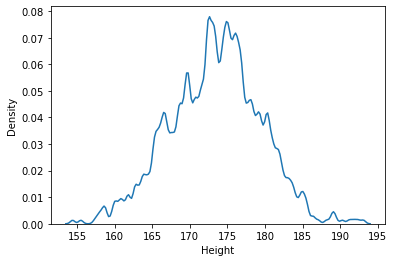

In [9]:
#kde 그래프 그리는 함수 = sns.kdeplot()
#bw: 그래프의 구간을 결정; bw 값이 클수록 부드러운 그래프
sns.kdeplot(body_df['Height'], bw = 0.05)

<AxesSubplot:ylabel='Frequency'>

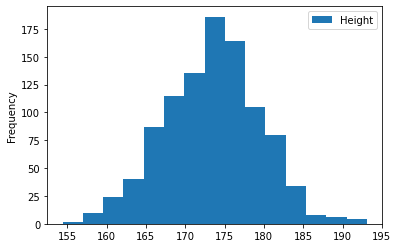

In [11]:
body_df.plot(kind = 'hist', y = 'Height', bins = 15)

C:\Users\jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

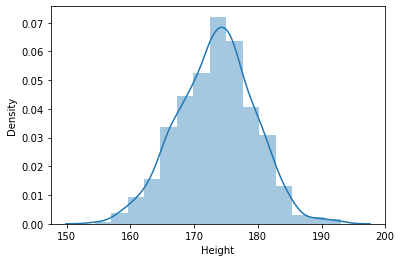

In [13]:
#히스트그램과 kde 플롯을 동시에 보여주는 함수
sns.distplot(body_df['Height'], bins = 15)

<AxesSubplot:>

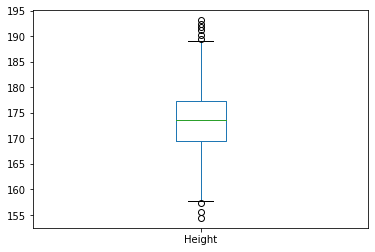

In [14]:
body_df.plot(kind = 'box', y = 'Height')

<AxesSubplot:ylabel='Height'>

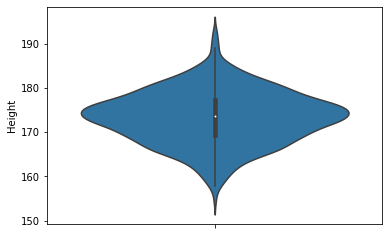

In [15]:
#box 플롯과 kde 플롯을 동시에 보여줌; 
#whisker는 날라가고 kde플롯을 양옆에 대칭으로 보여줌
sns.violinplot(y = body_df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

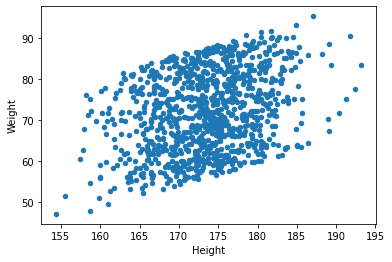

In [16]:
body_df.plot(kind = 'scatter', x= 'Height', y='Weight')

C:\Users\jiwon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

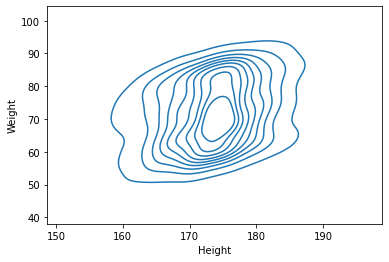

In [17]:
#등고선 표시 그래프
#x축에는 키에 대한 kde 그래프, y축에는 몸무게에 대한 kde 그래프
# 두개를 3차원으로 그린 그래프
#선이 가까울수록 가파르고, 선이 멀수록 평평함

sns.kdeplot(body_df['Height'], body_df['Weight'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

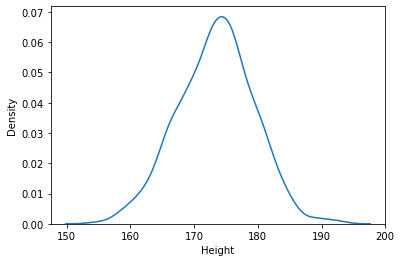

In [18]:
sns.kdeplot(body_df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

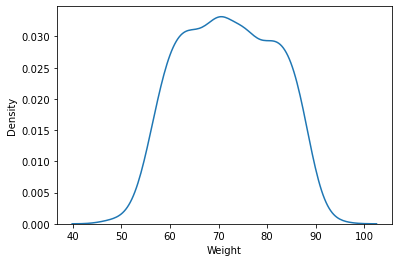

In [19]:
sns.kdeplot(body_df['Weight'])

LM plot = Linear Model plot

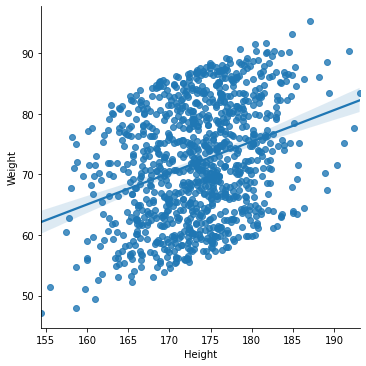

In [20]:
#산점도와 회귀선을 보여줌
#회귀선 = 흩어져 있는 점들을 모아준 선
sns.lmplot(data = body_df, x = 'Height', y = 'Weight')

카테고리별 시각화
catplot = category plot

In [21]:
laptop_df = pd.read_csv('laptops.csv')
laptop_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [23]:
laptop_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

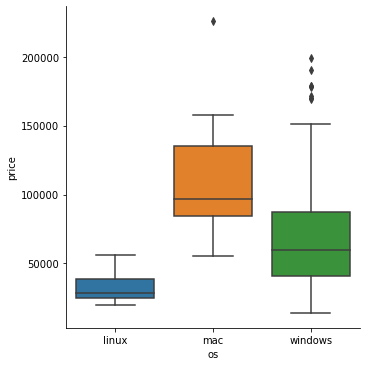

In [26]:
sns.catplot(data = laptop_df, x = 'os', y = 'price', kind = 'box')

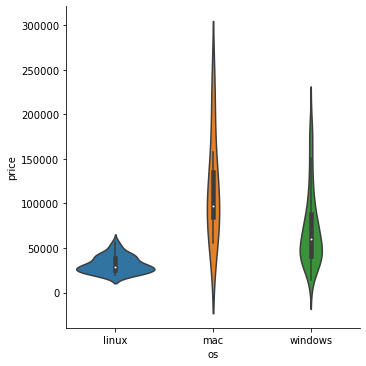

In [27]:
sns.catplot(data = laptop_df, x = 'os', y = 'price', kind = 'violin')

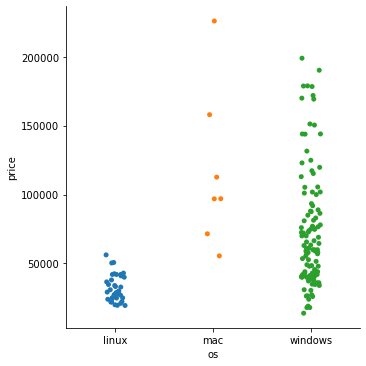

In [28]:
sns.catplot(data = laptop_df, x = 'os', y = 'price', kind = 'strip')

In [30]:
laptop_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

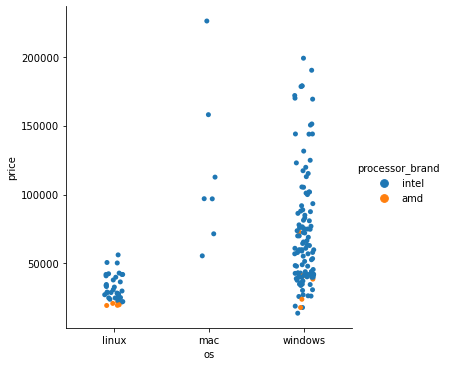

In [32]:
#hue : 지정한 항목에 따라 색깔을 다르게 지정해줌
sns.catplot(data = laptop_df, x = 'os', y = 'price', kind = 'strip', hue = 'processor_brand')

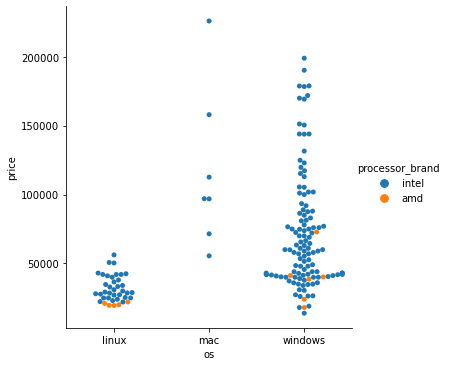

In [33]:
sns.catplot(data = laptop_df, x = 'os', y = 'price', kind = 'swarm', hue = 'processor_brand')

# 3-3 상관계수

In [35]:
%matplotlib inline
import pandas as pd
import seaborn as sns


In [36]:
body_df.corr()

,Height,Weight
Height,1.000000,0.325713
Weight,0.325713,1.000000


<AxesSubplot:>

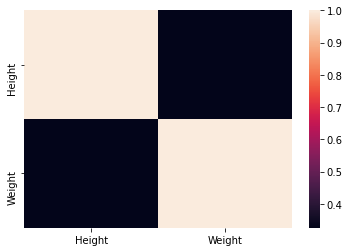

In [37]:
sns.heatmap(body_df.corr())

<AxesSubplot:>

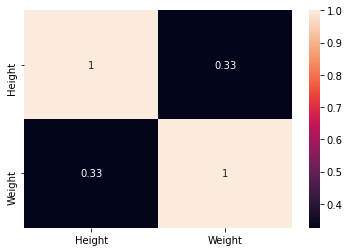

In [39]:
sns.heatmap(body_df.corr(), annot=True)